In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
im = cv2.imread("colour-drawing-58.jpg")
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print(im.shape)

(720, 1280, 3)


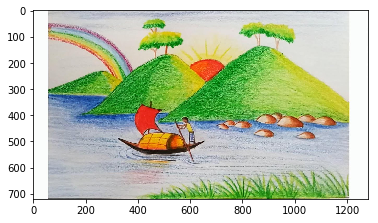

In [3]:
plt.imshow(im)
plt.show()

In [4]:
all_pixel = im.reshape((-1,3))
print(all_pixel.shape)

(921600, 3)


In [5]:
from sklearn.cluster import KMeans

In [21]:
dominant_colors=5
km = KMeans(n_clusters=dominant_colors)


In [22]:
km.fit(all_pixel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
print(km.cluster_centers_)

[[162.03347642 192.13294574  79.81052168]
 [ 56.56443941 133.9132786   54.97184315]
 [184.83036768 187.7745158  190.28768674]
 [201.88979197  86.53707344  37.52301869]
 [232.15919328 232.52363765 229.65482454]]


In [24]:
centers = km.cluster_centers_

In [25]:
centers = np.array(centers,dtype="uint8")

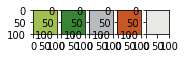

In [26]:
i=1
colors=[]
plt.figure(0,figsize=(10,20))
for col in centers:
    plt.subplot(1,20,i)
    i+=1
    colors.append(col)
    a=np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]=col
    plt.imshow(a)

In [27]:
new_image = np.zeros((720*1280,3),dtype="uint8")

In [28]:
colors

[array([162, 192,  79], dtype=uint8),
 array([ 56, 133,  54], dtype=uint8),
 array([184, 187, 190], dtype=uint8),
 array([201,  86,  37], dtype=uint8),
 array([232, 232, 229], dtype=uint8)]

In [29]:
km.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [30]:
for ix in range(new_image.shape[0]):
    new_image[ix]=colors[km.labels_[ix]]
    

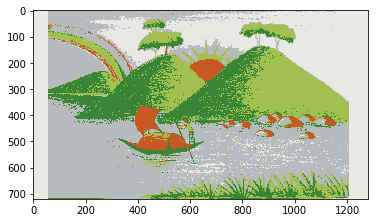

In [31]:
new_image= new_image.reshape((720,1280,3))
plt.imshow(new_image)
plt.show()